# 상품별 성별 선호도 분석

## #01. 패키지 참조

In [60]:
import sys
import pandas as pd
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [61]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [62]:
origin = read_excel('#5.musinsadata_login_refine.xlsx')
origin

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,117,2685576,14,62,0,249.00,0.034896,0.103114,0.207197,0.206228,...,16506,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,0.472498,0.527502,1109
1,127,451851,13,47,1,268.00,0.055769,0.261692,0.289070,0.205018,...,18774,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,0.905060,0.094940,1759
2,144,3276429,13,5,1,259.00,0.010966,0.178638,0.345433,0.268067,...,18238,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,0.968986,0.031014,2386
3,150,595038,13,5,0,146.00,0.045262,0.253340,0.258896,0.187040,...,16018,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,0.641407,0.358593,2019
4,171,1231944,9,108,0,139.00,0.085543,0.341216,0.265107,0.114992,...,15688,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,0.435115,0.564885,3668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,7677,3666394,3,102,2,89.00,0.148071,0.314392,0.246682,0.126296,...,9644,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,60
5740,7678,2697817,6,26,0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
5741,7679,2757362,6,122,0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
5742,7680,3220337,3,102,0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405


## #02. 데이터 정제

In [63]:
gender_df = origin.filter(['상품번호','남성 조회수','여성 조회수', '조회수', '성별', '종류','분류','남성 구매수','여성 구매수','구매수', '가격'],axis=1)
gender_df

,상품번호,남성 조회수,여성 조회수,조회수,성별,종류,분류,남성 구매수,여성 구매수,구매수,가격
0,2685576,0.462377,0.537623,16506,0,14,62,0.472498,0.527502,1109,249.00
1,451851,0.905614,0.094386,18774,1,13,47,0.905060,0.094940,1759,268.00
2,3276429,0.963976,0.036024,18238,1,13,5,0.968986,0.031014,2386,259.00
3,595038,0.693220,0.306780,16018,0,13,5,0.641407,0.358593,2019,146.00
4,1231944,0.440910,0.559090,15688,0,9,108,0.435115,0.564885,3668,139.00
...,...,...,...,...,...,...,...,...,...,...,...
5739,3666394,0.095707,0.904293,9644,2,3,102,0.066667,0.933333,60,89.00
5740,2697817,0.329863,0.670137,1825,0,6,26,0.375912,0.624088,274,69.90
5741,2757362,0.712056,0.287944,6727,0,6,122,0.754647,0.245353,269,38.00
5742,3220337,0.624564,0.375436,3151,0,3,102,0.595842,0.404158,2405,55.00


In [64]:
gender_df = gender_df.dropna()
gender_df

,상품번호,남성 조회수,여성 조회수,조회수,성별,종류,분류,남성 구매수,여성 구매수,구매수,가격
0,2685576,0.462377,0.537623,16506,0,14,62,0.472498,0.527502,1109,249.00
1,451851,0.905614,0.094386,18774,1,13,47,0.905060,0.094940,1759,268.00
2,3276429,0.963976,0.036024,18238,1,13,5,0.968986,0.031014,2386,259.00
3,595038,0.693220,0.306780,16018,0,13,5,0.641407,0.358593,2019,146.00
4,1231944,0.440910,0.559090,15688,0,9,108,0.435115,0.564885,3668,139.00
...,...,...,...,...,...,...,...,...,...,...,...
5739,3666394,0.095707,0.904293,9644,2,3,102,0.066667,0.933333,60,89.00
5740,2697817,0.329863,0.670137,1825,0,6,26,0.375912,0.624088,274,69.90
5741,2757362,0.712056,0.287944,6727,0,6,122,0.754647,0.245353,269,38.00
5742,3220337,0.624564,0.375436,3151,0,3,102,0.595842,0.404158,2405,55.00


## #04. 데이터 가공하기

In [65]:
gender_df['남성 구매'] = gender_df['남성 구매수']* gender_df['구매수']
gender_df['여성 구매'] = gender_df['여성 구매수']* gender_df['구매수']
gender_df['남성 매출'] = gender_df['남성 구매'] * gender_df['가격']
gender_df['여성 매출'] = gender_df['여성 구매'] * gender_df['가격']
gender_df['매출'] = gender_df['구매수']* gender_df['가격']



In [66]:
# gender_df2['매출'] = gender_df2['구매수']* gender_df2['가격']
# gender_df2['남성 구매'] = gender_df2['남성 구매수']* gender_df2['구매수']
# gender_df2['여성 구매'] = gender_df2['여성 구매수']* gender_df2['구매수']
# gender_df2['남성 매출'] = gender_df2['남성 구매'] * gender_df2['가격']
# gender_df2['여성 매출'] = gender_df2['여성 구매'] * gender_df2['가격']

KeyError: '구매수'

In [ ]:
gender_df2 = gender_df2.filter(['상품번호','성별','남성 조회수','여성 조회수','남성 구매수','여성 구매수','남성 구매','여성 구매','남성 매출','여성 매출'])

In [67]:
type_df = gender_df.groupby(['분류','종류'],as_index=False)[['남성 구매', '여성 구매', '구매수','남성 매출', '여성 매출','매출','남성 조회수','여성 조회수', '조회수']].sum()
# result_df[['조회수', '구매수']] = result_df[['조회수', '구매수',]].astype(int)
# result_df
category_df = gender_df.groupby(['종류'],as_index=False)[['남성 구매', '여성 구매', '구매수','남성 매출', '여성 매출','매출','남성 조회수','여성 조회수', '조회수']].sum()
cp_df1 = gender_df.groupby(['종류'],as_index=False)[['남성 구매', '여성 구매','남성 매출', '여성 매출','남성 조회수','여성 조회수']].sum()
cp_df2 = gender_df.groupby(['분류'],as_index=False)[['남성 구매', '여성 구매','남성 매출', '여성 매출','남성 조회수','여성 조회수']].sum()


In [68]:
category_df.sort_values(by='남성 구매', ascending = False)
type_df.sort_values(by='남성 구매', ascending = False)
cp_df1.sort_values(by='남성 구매', ascending = False)
cp_df2.sort_values(by='남성 구매', ascending = False)

,분류,남성 구매,여성 구매,남성 매출,여성 매출,남성 조회수,여성 조회수
19,20,400461.0,106981.0,27910535.85,6145550.30,345.497335,96.502665
17,18,240132.0,108410.0,15824463.16,7499775.33,361.584294,194.415706
119,122,211123.0,243216.0,12478418.80,14082373.74,199.685434,215.314566
25,26,183559.0,128446.0,9304382.26,6990454.77,170.266541,118.733459
62,64,170621.0,41060.0,6372026.98,1342868.01,113.333413,28.666587
...,...,...,...,...,...,...,...
80,82,33.0,378.0,1640.10,18786.60,0.201216,0.798784
39,40,31.0,202.0,895.90,5837.80,0.119089,0.880911
77,79,29.0,587.0,1450.00,29350.00,0.038911,0.961089
33,34,18.0,287.0,864.00,13776.00,0.033924,0.966076


### [1] 남성 판매 상품

In [69]:
male_p =type_df.sort_values(by= '남성 구매', ascending=False)
male_t =type_df.sort_values(by= '남성 매출', ascending=False)
# male_p =male_p.head(5)
# male_t =male_t.head(5)


In [70]:
male_cp =category_df.sort_values(by= '남성 구매', ascending=False)
male_ct =category_df.sort_values(by= '남성 매출', ascending=False)



<Axes: >

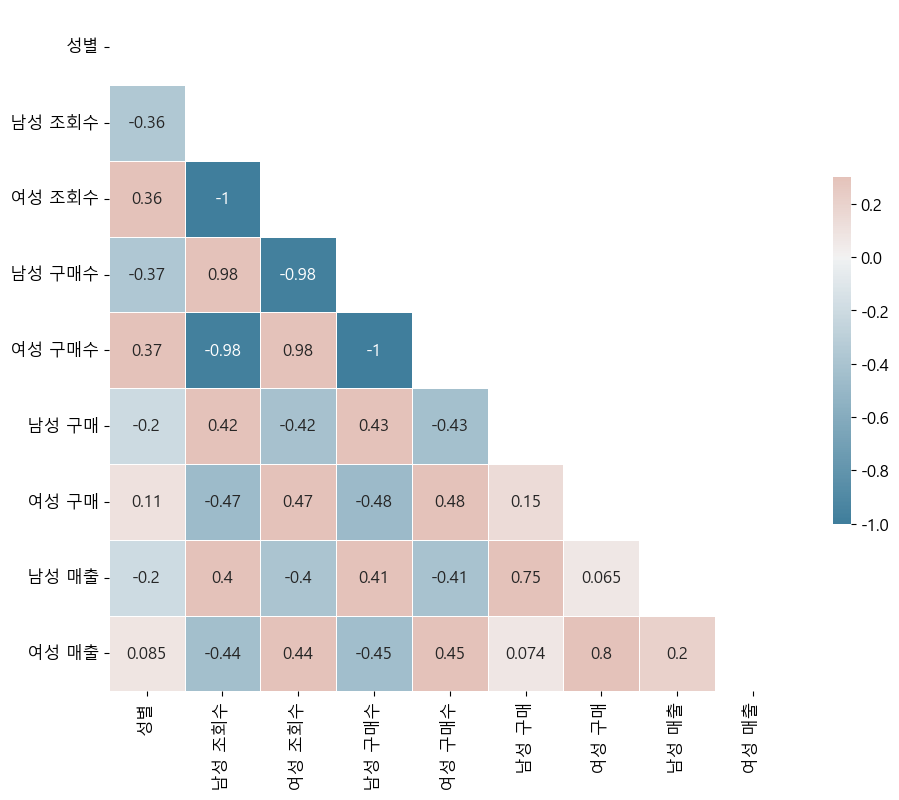

In [71]:

gender_df2_crr = gender_df2.corr()

#from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt

#sb.set_theme(style="white")


# Compute the correlation matrix
corr = gender_df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask = mask,annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

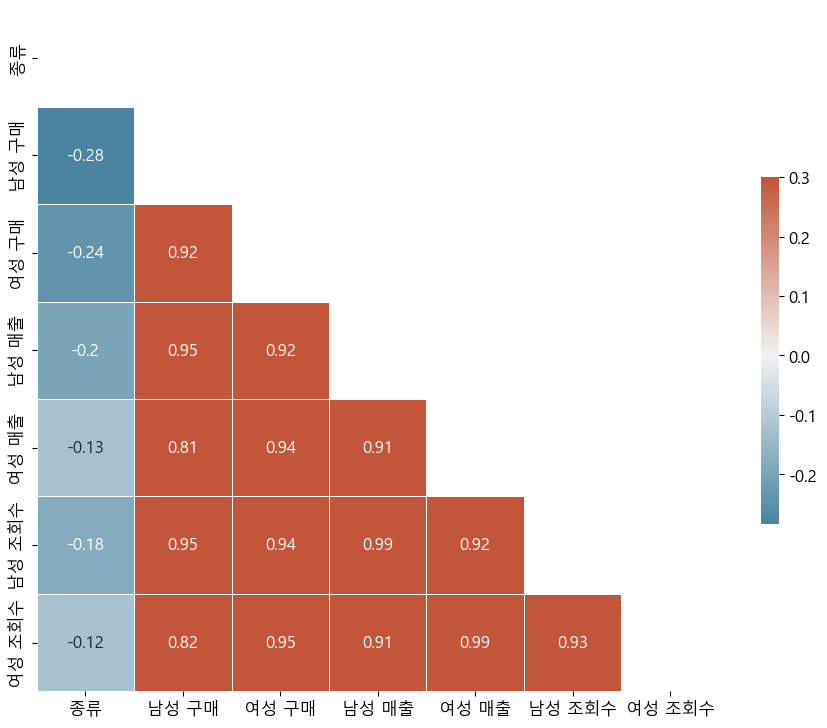

In [ ]:
# male_cp_crr = male_cp.corr
# male_ct_crr = male_ct.corr
# male_p_crr = male_p.corr
# male_t_crr = male_t.corr
# gender_df2_crr = gender_df

#from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt

#sb.set_theme(style="white")


# Compute the correlation matrix
corr = cp_df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask = mask,annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

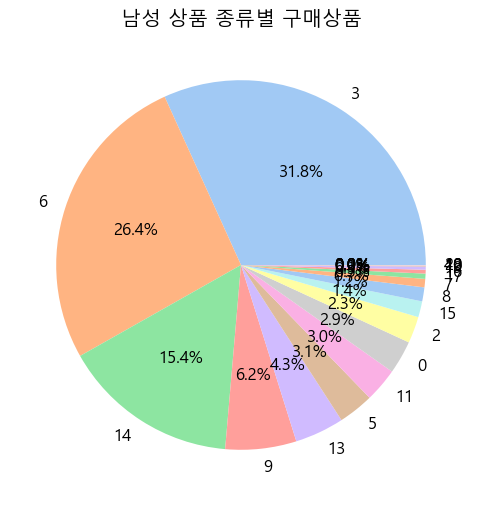

In [72]:
plt.figure()
plt.title("남성 상품 종류별 구매상품")
plt.pie(male_cp['남성 구매'], labels=male_cp['종류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

In [73]:
male_cp1 = male_p[male_p['종류']==3]
male_cp2 = male_p[male_p['종류']==6]
male_cp3 = male_p[male_p['종류']==14]
male_cp1.sort_values(by = '남성 구매', ascending = False)
male_cp2.sort_values(by = '남성 구매', ascending = False)
male_cp3.sort_values(by = '남성 구매', ascending = False)
male_cp1 = male_cp1.head(5)
male_cp2 = male_cp2.head(5)
male_cp3 = male_cp3.head(5)

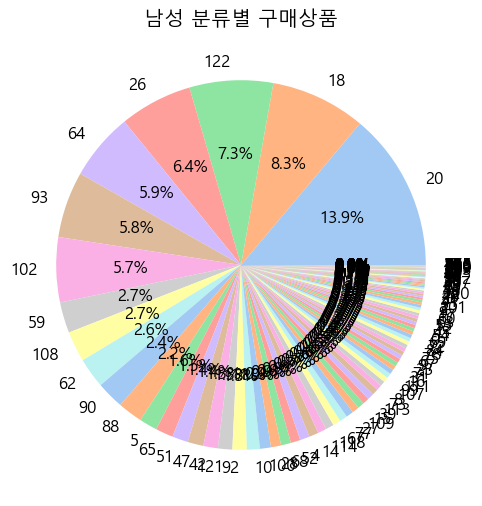

In [74]:
plt.figure()
plt.title("남성 분류별 구매상품")
plt.pie(male_p['남성 구매'], labels=male_p['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

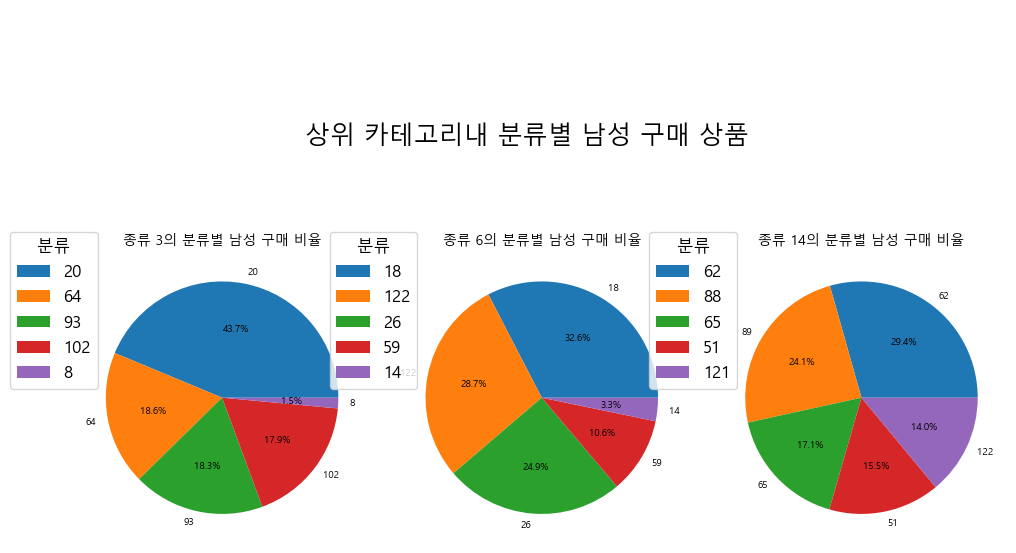

In [75]:
# --------------------------------------------------------------
# 1행 3열의 영역을 생성한다
# --------------------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

# 전체 제목
fig.suptitle('\n\n\n\n상위 카테고리내 분류별 남성 구매 상품', fontsize=18, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# --------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 분류 20
# --------------------------------------------------------------
# 파이그래프
ax1.pie(male_cp1['남성 구매'], labels=male_cp1['분류'], autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 7})

# 그래프 제목
ax1.title.set_text("종류 3의 분류별 남성 구매 비율")
ax1.title.set_fontsize(10)
ax1.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax1.grid()

# y축 라벨이 불필요하므로 제거
ax1.set(ylabel=None)

# 범주 표시
ax1.legend(labels=male_cp1['분류'], title='분류', bbox_to_anchor=(0.1, 1.1))

# --------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 분류 18
# --------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
# 파이그래프
ax2.pie(male_cp2['남성 구매'], labels=male_cp2['분류'], autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 7})
# 그래프 제목
ax2.title.set_text("종류 6의 분류별 남성 구매 비율")
ax2.title.set_fontsize(10)
ax2.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax2.grid()

# y축 라벨이 불필요하므로 제거
ax2.set(ylabel=None)

# 범주 표시
ax2.legend(labels=male_cp2['분류'], title='분류', bbox_to_anchor=(0.1, 1.1))


# --------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 분류 122
# --------------------------------------------------------------
# 파이그래프
ax3.pie(male_cp3['남성 구매'], labels=male_cp3.index, autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 7})

# 그래프 제목
ax3.title.set_text("종류 14의 분류별 남성 구매 비율")
ax3.title.set_fontsize(10)
ax3.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=male_cp3['분류'], title='분류', bbox_to_anchor=(0.1, 1.1))


# --------------------------------------------------------------
# 그래프 출력하기
# --------------------------------------------------------------
plt.show()
plt.close()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# from matplotlib.patches import ConnectionPatch

# # make figure and assign axis objects
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
# fig.subplots_adjust(wspace=0)
# overall_ratios = male_t['남성 구매']

# explode = [0.1, 0, 0, 0, 0]
# # rotate so that first wedge is split by the x-axis
# angle = -180 * overall_ratios.index[1]*0.25
# wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
#                      labels=male_t['분류'], explode=explode)

# # bar chart parameters
# sub_ratios = male_cp1['남성 구매']
# sub_labels = male_cp1['분류']
# bottom = 1
# width = .2

# # Adding from the top matches the legend.
# for j, (height, label) in enumerate(reversed([*zip(sub_ratios, sub_labels)])):
#     bottom -= height
#     bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
#                  alpha=0.1 + 0.25 * j)
#     ax2.bar_label(bc, labels=[f"{height/male_cp1['남성 구매'].sum():.0%}"], label_type='center')

# ax2.set_title('종류 별 남성 구매수')
# ax2.legend()
# ax2.axis('off')
# ax2.set_xlim(- 2.5 * width, 2.5 * width)

# # use ConnectionPatch to draw lines between the two plots
# theta1, theta2 = wedges[0].theta1, wedges[0].theta2
# center, r = wedges[0].center, wedges[0].r
# bar_height = sum(sub_ratios)

# # draw top connecting line
# x = r * np.cos(np.pi / 180 * theta2) + center[0]
# y = r * np.sin(np.pi / 180 * theta2) + center[1]
# con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
#                       xyB=(x, y), coordsB=ax1.transData)
# con.set_color([0, 0, 0])
# con.set_linewidth(4)
# ax2.add_artist(con)

# # draw bottom connecting line
# x = r * np.cos(np.pi / 180 * theta1) + center[0]
# y = r * np.sin(np.pi / 180 * theta1) + center[1]
# con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
#                       xyB=(x, y), coordsB=ax1.transData)
# con.set_color([0, 0, 0])
# ax2.add_artist(con)
# con.set_linewidth(4)

# plt.show()

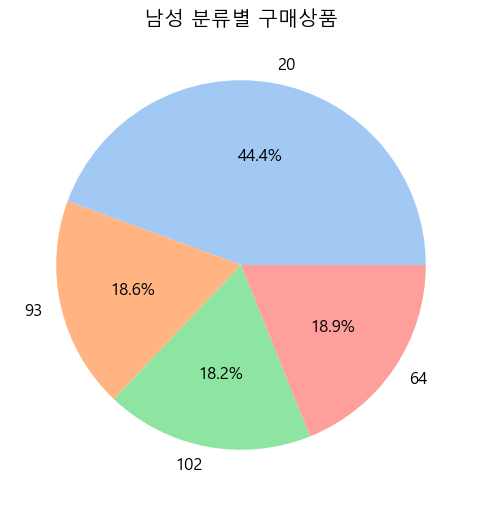

In [ ]:
plt.figure()
plt.title("남성 분류별 구매상품")
plt.pie(male_cp1['남성 구매'], labels=male_cp1['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

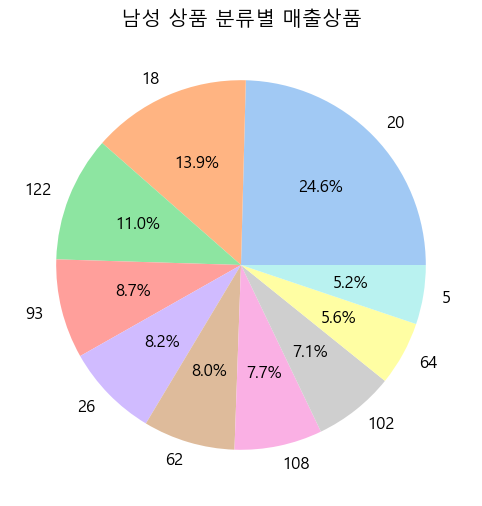

In [ ]:
plt.figure()
plt.title("남성 상품 분류별 매출상품")
plt.pie(male_t['남성 매출'], labels=male_t['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

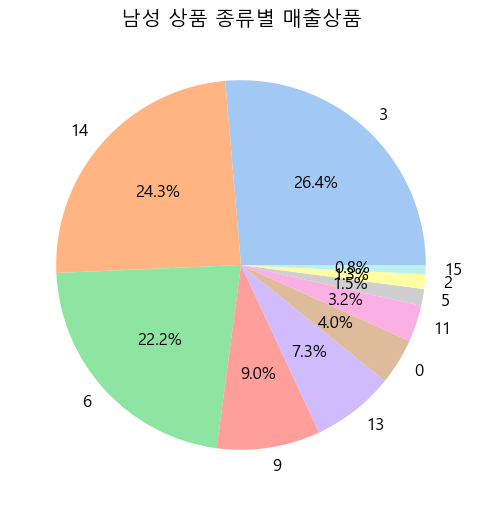

In [ ]:
plt.figure()
plt.title("남성 상품 종류별 매출상품")
plt.pie(male_ct['남성 매출'], labels=male_ct['종류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

### [2] 여성 판매 상품

In [76]:
female_p =type_df.sort_values(by= '여성 구매', ascending=False)
female_t =type_df.sort_values(by= '여성 매출', ascending=False)
female_p =female_p.head(10)
female_t =female_t.head(10)
female_p

,분류,종류,남성 구매,여성 구매,구매수,남성 매출,여성 매출,매출,남성 조회수,여성 조회수,조회수
123,122,6,211123.0,243216.0,454339,12478418.80,14082373.74,26560792.54,199.685434,215.314566,2305422
104,102,3,163896.0,144819.0,308709,8052258.82,6735223.66,14787263.70,145.072801,118.927199,1439939
25,26,6,183559.0,128446.0,311987,9304382.26,6990454.77,16293869.63,170.266541,118.733459,1558857
17,18,6,240132.0,108410.0,348536,15824463.16,7499775.33,23323885.91,361.584294,194.415706,3246937
19,20,3,400461.0,106981.0,507422,27910535.85,6145550.30,34054927.37,345.497335,96.502665,2499798
109,108,9,77148.0,69913.0,147059,8721161.23,8496699.01,17217690.24,99.141249,113.858751,1291497
62,62,14,76306.0,68788.0,145088,9129064.39,8904890.05,18033532.44,198.487934,183.512066,2371372
122,121,14,36324.0,63987.0,100309,2195484.11,4475388.19,6670663.70,39.257662,58.742338,516994
60,60,17,7180.0,54551.0,61729,719525.70,5055849.54,5775017.24,5.743927,81.256073,499416
91,90,9,69516.0,53836.0,123344,5566038.39,4277478.59,9842564.98,67.071725,55.928275,695003


In [77]:
female_cp =category_df.sort_values(by= '여성 구매', ascending=False)
female_ct =category_df.sort_values(by= '여성 매출', ascending=False)
female_cp =female_cp.head(10)
female_ct =female_ct.head(10)
female_cp

,종류,남성 구매,여성 구매,구매수,남성 매출,여성 매출,매출,남성 조회수,여성 조회수,조회수
6,6,762223.0,544670.0,1306869,44798832.71,3.189812e+07,7.669564e+07,814.803947,588.196053,7799517
3,3,917393.0,342493.0,1259856,53159484.74,1.705459e+07,7.021242e+07,789.493828,300.506172,6082016
14,14,445766.0,334175.0,779921,49067271.55,3.240499e+07,8.146990e+07,814.031048,608.968952,8239121
9,9,179234.0,154233.0,333455,18244619.02,1.677103e+07,3.501425e+07,208.521041,212.478959,2420621
17,17,13149.0,99346.0,112493,1393196.64,9.555275e+06,1.094811e+07,11.039643,151.960357,954450
5,5,89363.0,97288.0,186651,2963987.07,3.856783e+06,6.820770e+06,54.413229,90.586771,477964
2,2,67087.0,85732.0,152819,2594556.21,3.439534e+06,6.034090e+06,50.103380,85.896620,735082
0,0,83984.0,82486.0,166470,8156299.44,7.440664e+06,1.559696e+07,80.436813,116.563187,964345
13,13,124372.0,73451.0,197823,14635690.16,8.048234e+06,2.268392e+07,174.549109,135.450891,1709306
8,8,35256.0,45003.0,80257,1383281.19,2.329173e+06,3.712412e+06,25.588379,44.411621,354426


In [78]:
female_cp1 = female_p[female_p['종류']==6]
female_cp2 = female_p[female_p['종류']==3]
female_cp3 = female_p[female_p['종류']==14]
female_cp1.sort_values(by = '여성 구매', ascending = False)
female_cp2.sort_values(by = '여성 구매', ascending = False)
female_cp3.sort_values(by = '여성 구매', ascending = False)
female_cp1 = female_cp1.head(5)
female_cp2 = female_cp2.head(5)
female_cp3 = female_cp3.head(5)

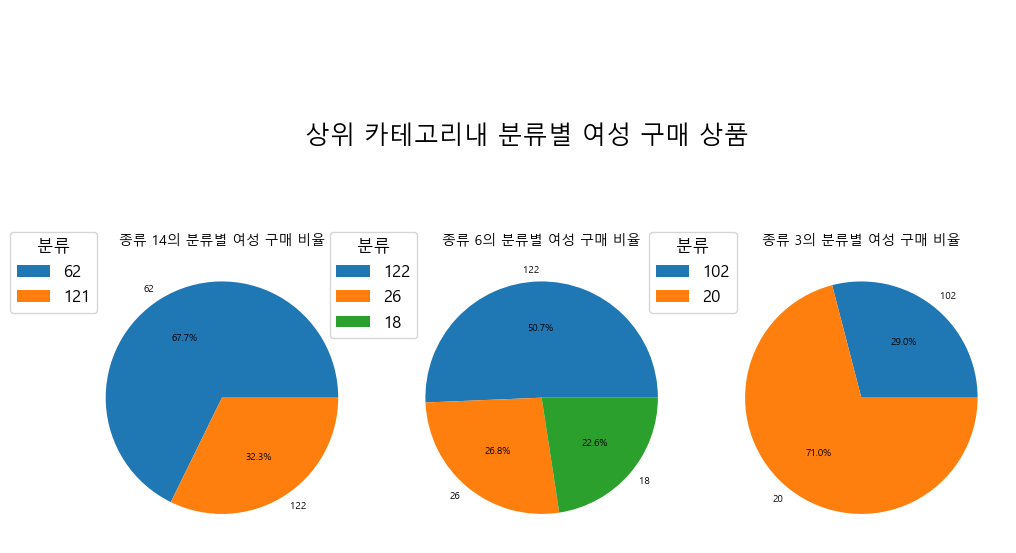

In [79]:
# --------------------------------------------------------------
# 1행 3열의 영역을 생성한다
# --------------------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

# 전체 제목
fig.suptitle('\n\n\n\n상위 카테고리내 분류별 여성 구매 상품', fontsize=18, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# --------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 분류 20
# --------------------------------------------------------------
# 파이그래프
ax2.pie(female_cp1['여성 구매'], labels=female_cp1['분류'], autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 7})

# 그래프 제목
ax2.title.set_text("종류 6의 분류별 여성 구매 비율")
ax2.title.set_fontsize(10)
ax2.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax2.grid()

# y축 라벨이 불필요하므로 제거
ax2.set(ylabel=None)

# 범주 표시
ax2.legend(labels=female_cp1['분류'], title='분류', bbox_to_anchor=(0.1, 1.1))

# --------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 분류 18
# --------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
# 파이그래프
ax3.pie(female_cp2['남성 구매'], labels=female_cp2['분류'], autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 7})
# 그래프 제목
ax3.title.set_text("종류 3의 분류별 여성 구매 비율")
ax3.title.set_fontsize(10)
ax3.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=female_cp2['분류'], title='분류', bbox_to_anchor=(0.1, 1.1))


# --------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 분류 122
# --------------------------------------------------------------
# 파이그래프
ax1.pie(female_cp3['남성 구매'], labels=female_cp3.index, autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 7})

# 그래프 제목
ax1.title.set_text("종류 14의 분류별 여성 구매 비율")
ax1.title.set_fontsize(10)
ax1.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax1.grid()

# y축 라벨이 불필요하므로 제거
ax1.set(ylabel=None)

# 범주 표시
ax1.legend(labels=female_cp3['분류'], title='분류', bbox_to_anchor=(0.1, 1.1))


# --------------------------------------------------------------
# 그래프 출력하기
# --------------------------------------------------------------
plt.show()
plt.close()

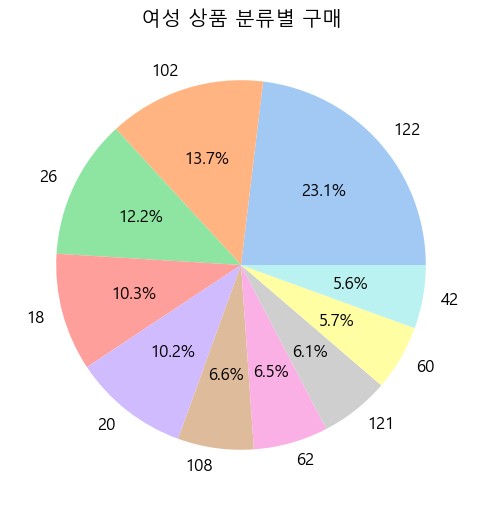

In [ ]:
plt.figure()
plt.title("여성 상품 분류별 구매")
plt.pie(female_p['여성 구매'], labels=female_p['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

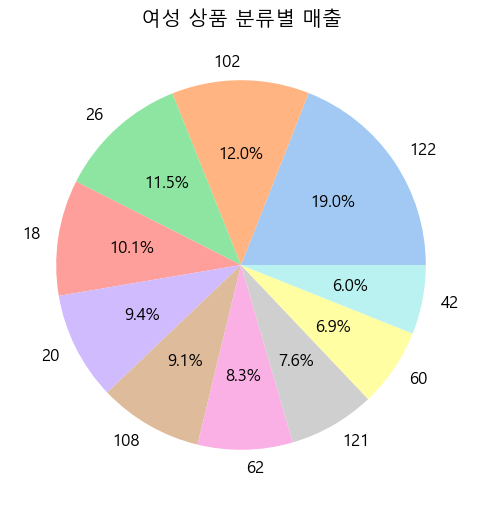

In [ ]:
plt.figure()
plt.title("여성 상품 분류별 매출")
plt.pie(female_t['여성 매출'], labels=female_p['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

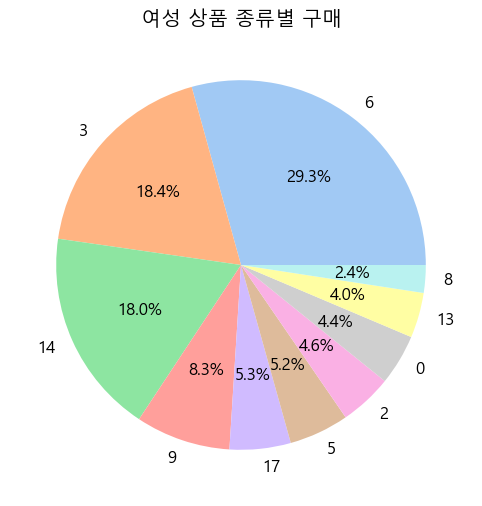

In [ ]:
plt.figure()
plt.title("여성 상품 종류별 구매")
plt.pie(female_cp['여성 구매'], labels=female_cp['종류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

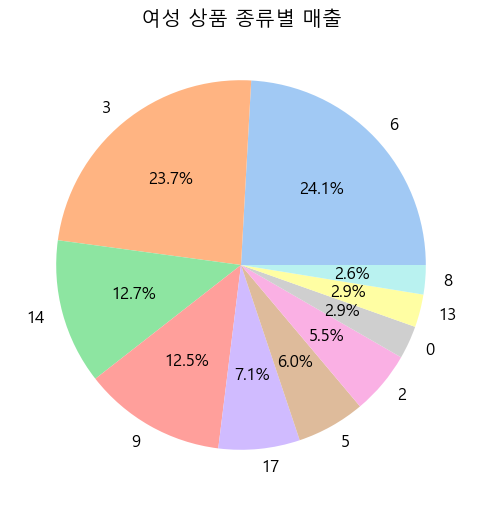

In [ ]:
plt.figure()
plt.title("여성 상품 종류별 매출")
plt.pie(female_ct['여성 매출'], labels=female_cp['종류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

### [3] 남성 분류별 조회 상품

In [ ]:
male_v =type_df.sort_values(by= '남성 조회수', ascending=False)
male_cv =category_df.sort_values(by = '남성 조회수', ascending = False)
male_v = male_v.head(5)
male_cv = male_cv.head(5)

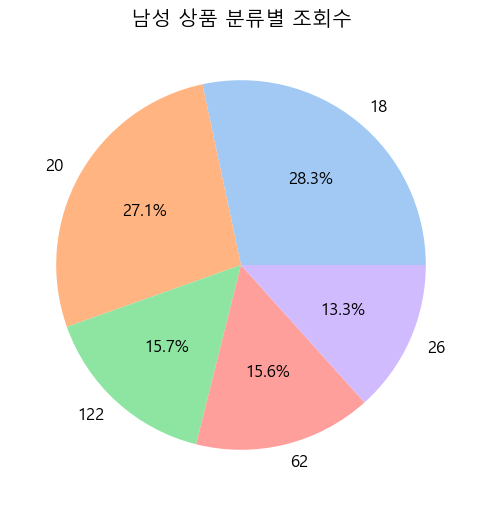

In [ ]:
plt.figure()
plt.title("남성 상품 분류별 조회수")
plt.pie(male_v['남성 조회수'], labels=male_v['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

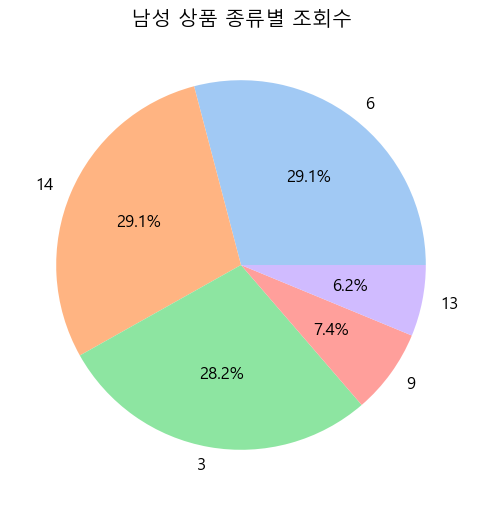

In [ ]:
plt.figure()
plt.title("남성 상품 종류별 조회수")
plt.pie(male_cv['남성 조회수'], labels=male_cv['종류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

### [4] 여성 분류별 조회 상품

In [ ]:
female_v =type_df.sort_values(by= '여성 조회수', ascending=False)
female_cv =category_df.sort_values(by= '여성 조회수', ascending=False)
female_v =female_v.head(5)
female_cv =female_cv.head(5)

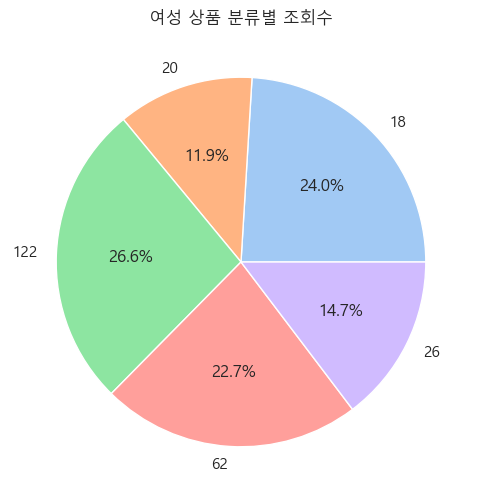

In [ ]:
plt.figure()
plt.title("여성 상품 분류별 조회수")
plt.pie(male_v['여성 조회수'], labels=male_v['분류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()

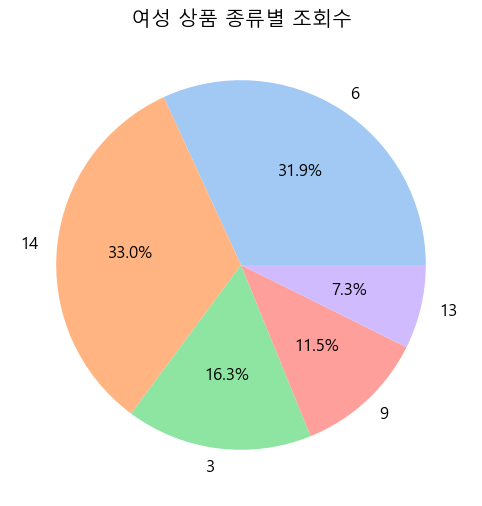

In [ ]:
plt.figure()
plt.title("여성 상품 종류별 조회수")
plt.pie(male_cv['여성 조회수'], labels=male_cv['종류'], autopct='%0.1f%%', colors=sb.color_palette('pastel'))
plt.show()
plt.close()